In [1]:
import numpy as np 
from Option import Option
from Dynamic_programming import Dynamic_pricing
from Monte_carlo import MonteCarlo_simulator

# **Testing**

In [6]:

import numpy as np

def Laguerre_base(m, x):
    laguerre_polynomials = np.zeros(m)
    for i in range(m):
        laguerre_polynomials[i] = np.exp(-x / 2) * x**i * np.sqrt(np.math.factorial(i) / np.math.factorial(i + 1))
    return laguerre_polynomials


In [12]:
def payoff_function(S):
    return np.maximum(S - 90, 0)  # Example call option payoff function

def Projection_base(m, x):
    return x ** np.arange(1, m + 1)  # Polynomial projection base



# Create instance of DynamicPricing
r = 0.05
sigma = 0.2
S0 = 80
L = 50
n = 100
m = 100 # Degree of polynomial

Simulation = MonteCarlo_simulator(r,sigma,S0,L,n)

# Simulation.visualisation_price()
call = Option(s0 = S0,T = L,K =10,call=True)
price_simu = Simulation.monte_carlo_price_simulator()
payoff_simulation = Simulation.monte_carlo_payoff_simulator(call.payoff)




dynamic_pricing = Dynamic_pricing(r, sigma, S0, L, n, m,Laguerre_base, payoff_function)

# Calculate dynamic pricing
U_0 = dynamic_pricing.dynamic_prog_price()
print("Dynamic Pricing:", U_0)

# # Visualize asset price simulation
# Price_simulation = dynamic_pricing.monte_carlo_price_simulator()
# dynamic_pricing.visualisation_price(Price_simulation)

Dynamic Pricing: 6.617127598427029


In [ ]:
import matplotlib.pyplot as plt 

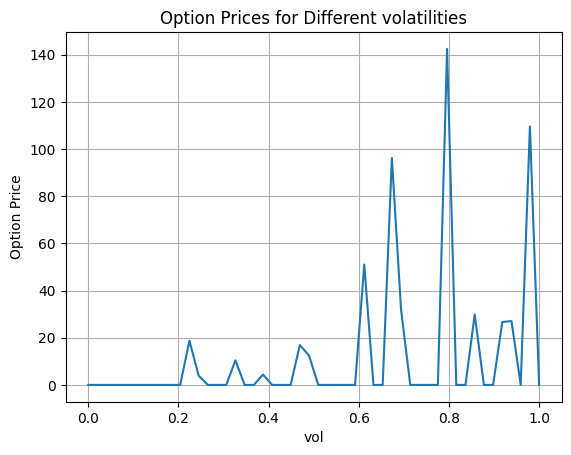

In [ ]:
Vol = np.linspace(0,1)
Prices_vol = [Dynamic_pricing(r, sigma, S0, L, n, m, Projection_base, payoff_function).dynamic_prog_price() for sigma in Vol]

plt.plot(Vol, Prices_vol)
plt.title('Option Prices for Different volatilities')
plt.xlabel('vol')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()


In [ ]:
np.shape(payoff_simulation)

(51, 50)